In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

## Loading Data

In [2]:
path_to_folder  = "/home/dcslab/Downloads/brain_tumor_dataset"
no_tumor_img = os.listdir(path= path_to_folder+'/no/')
yes_tumor_img = os.listdir(path= path_to_folder+'/yes/')

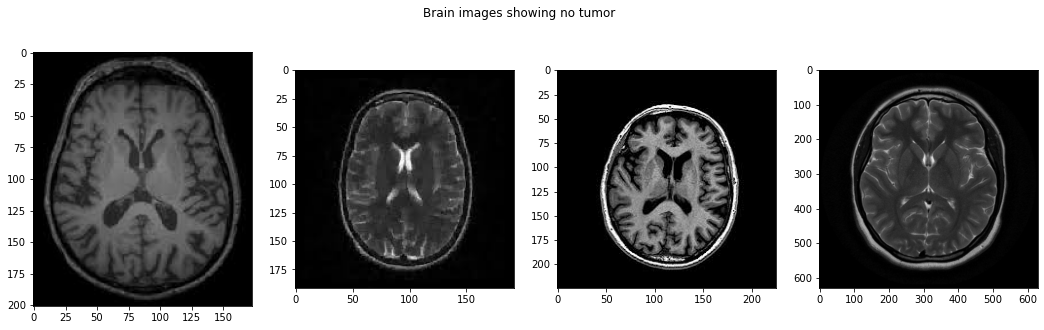

In [3]:
figure_size = plt.figure(figsize= (18,5))
for i in range(4):
    plt.subplot(1,4,i+1)
    image = cv2.imread('/home/dcslab/Downloads/brain_tumor_dataset/no/'+no_tumor_img[i])
    plt.imshow(image)
plt.suptitle("Brain images showing no tumor")
plt.show()

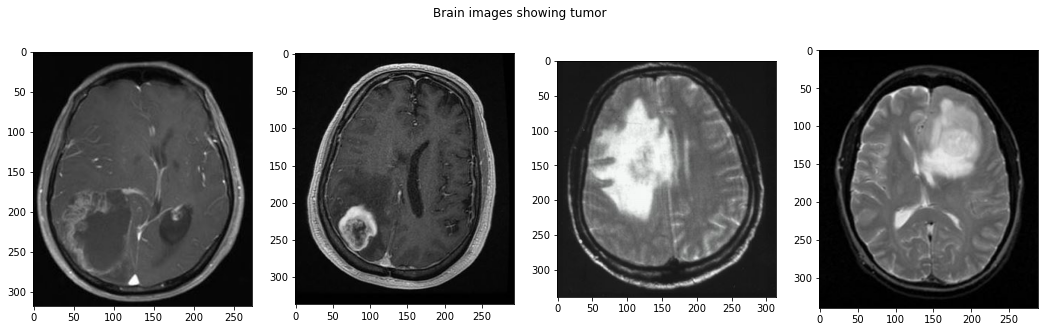

In [4]:
figure_size = plt.figure(figsize= (18,5))
for i in range(4):
    plt.subplot(1,4,i+1)
    image = cv2.imread('/home/dcslab/Downloads/brain_tumor_dataset/yes/' + yes_tumor_img[i])
    plt.imshow(image)
plt.suptitle("Brain images showing tumor")
plt.show()

## Cropping, Reshaping and Normalizing the images

In [5]:
classes = {'yes':1, 'no':0}
X= []
Y= []
for i in classes:
    path = '/home/dcslab/Downloads/brain_tumor_dataset/'+ i
    for j in os.listdir(path):
        img = cv2.imread(path+'/'+j, 0)
        img = cv2.resize(img, (240,240),interpolation= cv2.INTER_CUBIC)
        img = img / 253 # Normalization using total no. of images is 253
        X.append(img)
        Y.append(classes[i])

In [6]:
# Converting into array
x = np.array(X)
y = np.array(Y)
x.shape, y.shape

((253, 240, 240), (253,))

In [8]:
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers, models

### Splitting the data into test and train and then reshaping them

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=32)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((202, 240, 240), (202,), (51, 240, 240), (51,))

In [12]:
X_train = x_train.reshape(-1, 240, 240, 1)
X_test = x_test.reshape(-1, 240, 240, 1)
X_train.shape, X_test.shape

((202, 240, 240, 1), (51, 240, 240, 1))

# Building a Deep Convolutional Neural Network

In [15]:
cnn = keras.Sequential([
        
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(240, 240, 1)),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2), padding= 'valid'),
    
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compiling the model and fitting the training set

In [16]:
cnn.compile (
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs = 5)

Epoch 1/5
7/7 [==============================] - 6s 620ms/step - loss: 1.1159 - accuracy: 0.5842
Epoch 2/5
7/7 [==============================] - 4s 607ms/step - loss: 0.4605 - accuracy: 0.7970
Epoch 3/5
7/7 [==============================] - 4s 609ms/step - loss: 0.3592 - accuracy: 0.8614
Epoch 4/5
7/7 [==============================] - 4s 611ms/step - loss: 0.2222 - accuracy: 0.8960
Epoch 5/5
7/7 [==============================] - 4s 600ms/step - loss: 0.1124 - accuracy: 0.9604


In [17]:
cnn_prediction = cnn.predict(X_test)

2/2 [==============================] - 1s 84ms/step


Text(69.0, 0.5, 'Truth')

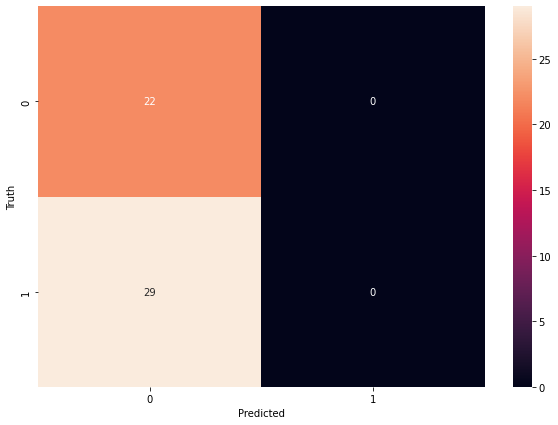

In [23]:
import seaborn as sn
import tensorflow
from sklearn.metrics import confusion_matrix

cnn_confusion_matrix = tensorflow.math.confusion_matrix(labels=y_test, predictions = cnn_prediction)
plt.figure(figsize = (10,7))
sn.heatmap(cnn_confusion_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Testing model

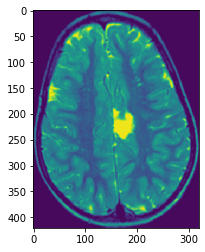

In [24]:
# This is a mri image showing brain tumor

mri_image = cv2.imread('brain_tumor.jpg',0)
plt.imshow(mri_image)

In [25]:
def prediction(img):
    img = cv2.resize(img, (240,240),interpolation= cv2.INTER_CUBIC)
    img = img / 253
    img = np.array(img)
    reshaped_img = img.reshape(-1, 240, 240, 1)
    flattening = cnn.predict(reshaped_img).flatten() 
    result = round(pd.Series(flattening))
    return result

#### Predicitng 

In [26]:
predicted_result = prediction(mri_image)
predicted_result

1/1 [==============================] - 0s 21ms/step


0    1.0
dtype: float32

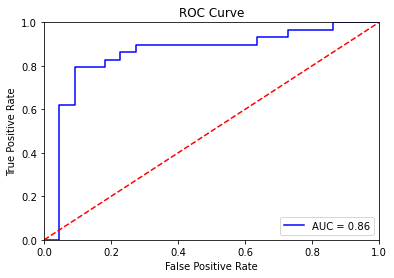

In [30]:
from sklearn import metrics 


fpr, tpr, threshold = metrics.roc_curve(y_test, cnn_prediction)
roc_auc = metrics.auc(fpr, tpr)
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

####                                                               Pranjal Tripathi